<a href="https://colab.research.google.com/github/martakrusz/COVID-19/blob/main/Covid_19_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Downloading data

In [1]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [2]:
import pandas as pd
from doctest import testmod #Import module for testing

In [4]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [5]:
#query = confirmed['Country/Region'] == 'Poland'
#pl = confirmed.loc[query]
#pl = pl.transpose()[4:] #to show 5 first lines of dataset
pl = (
    confirmed
    .loc[confirmed['Country/Region'] == 'Poland']
    .transpose()[4:]
)
pl.columns = ['Confirmed'] #Give name to a column
pl

,Confirmed
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
3/2/21,1719708
3/3/21,1735406
3/4/21,1750659
3/5/21,1766490


In [6]:
pl.index #Show indexes


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/25/21', '2/26/21', '2/27/21', '2/28/21', '3/1/21', '3/2/21',
       '3/3/21', '3/4/21', '3/5/21', '3/6/21'],
      dtype='object', length=410)

In [7]:
pd.to_datetime(pl.index) #Change date for European

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
               '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06'],
              dtype='datetime64[ns]', length=410, freq=None)

In [8]:
pl.index = pd.to_datetime(pl.index) #Permanently turns the European date into the index
pl

,Confirmed
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-03-02,1719708
2021-03-03,1735406
2021-03-04,1750659
2021-03-05,1766490


# Charts - Poland

Number of people confirmed in Poland






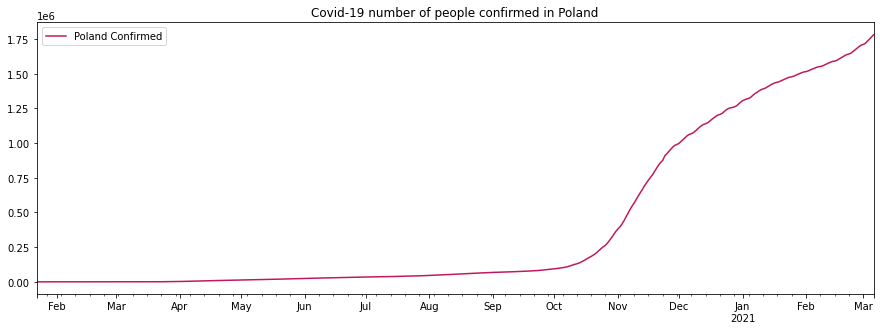

In [10]:
pl = (
    confirmed
    .loc[confirmed['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Confirmed']
pl.index = pd.to_datetime(pl.index)
pl.plot(figsize=(15,5), title="Covid-19 number of people confirmed in Poland", color="#c2185b")


Number of people recovered in Poland

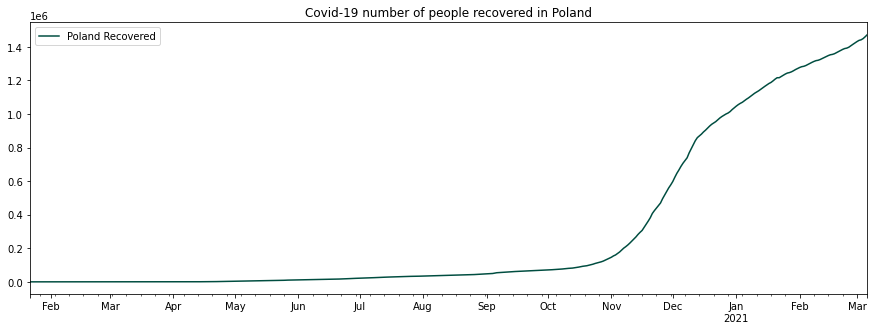

In [11]:
# other form of data retrieval
pl = (
    recovered
    .loc[recovered['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Recovered']
pl.index = pd.to_datetime(pl.index)
pl.plot(figsize=(15,5), title="Covid-19 number of people recovered in Poland", color="#004d40")

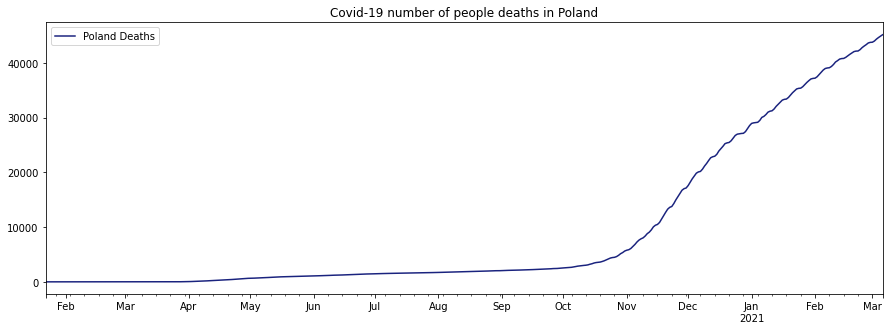

In [12]:
pl = (
    deaths
    .loc[deaths['Country/Region'] == 'Poland']
    .transpose()[4:]
)

pl.columns = ['Poland Deaths']
pl.index = pd.to_datetime(pl.index)
pl.plot(figsize=(15,5), title="Covid-19 number of people deaths in Poland", color="#1a237e")

In [13]:
def get(country, name, data):
    df = (data
          .loc[data['Country/Region'] == country]
          .transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

In [14]:

pl_confirmed = get('Poland', 'Poland Confirmed', confirmed)
pl_recovered = get('Poland', 'Poland Recovered', recovered)
pl_deaths = get('Poland', 'Poland Deaths', deaths)

In [15]:
pl = pd.concat((pl_confirmed,pl_recovered, pl_deaths), axis='columns')
pl

,Poland Confirmed,Poland Recovered,Poland Deaths
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2021-03-02,1719708,1438032,44008
2021-03-03,1735406,1441479,44360
2021-03-04,1750659,1448619,44649
2021-03-05,1766490,1459564,44912


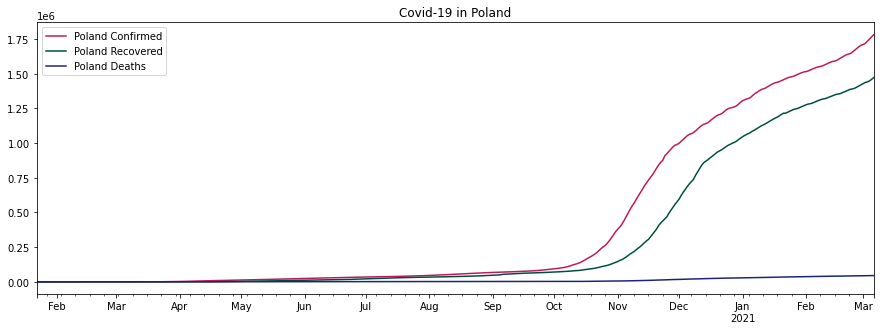

In [16]:
pl.plot(figsize=(15,5), title = 'Covid-19 in Poland', color=("#c2185b", "#004d40", "#1a237e"))

# Charts - other countries

In [17]:
us_confirmed = get('US', 'USA Confirmed', confirmed)
us_deaths = get('US', 'USA Deatchs', deaths)
us_recovered = get('US', 'USA Recovered', recovered)

us = pd.concat((us_confirmed, us_recovered, us_deaths), axis='columns')

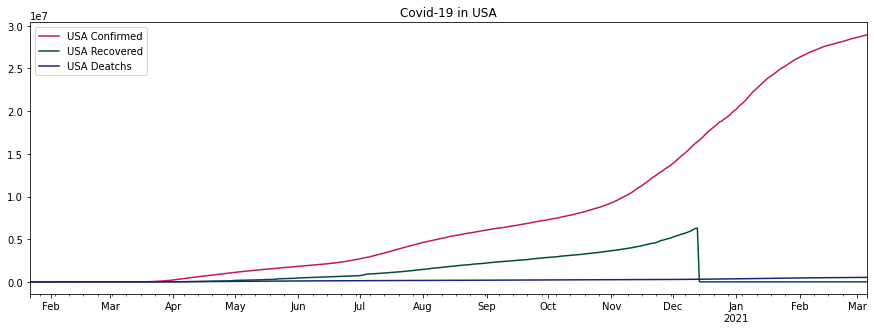

In [18]:
us.plot(figsize=(15,5), title = 'Covid-19 in USA', color=("#c2185b", "#004d40", "#1a237e"))

In [19]:
# a definition that supports different countries
def _get(country, name, data):
    df = (data
          .loc[data['Country/Region'] == country]
          .transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

def get(country):
    c = _get(country, 'Confirmed', confirmed)
    d = _get(country, 'Deaths', deaths)
    r = _get(country, 'Recovered', recovered)
    return pd.concat((c, r, d), axis='columns')

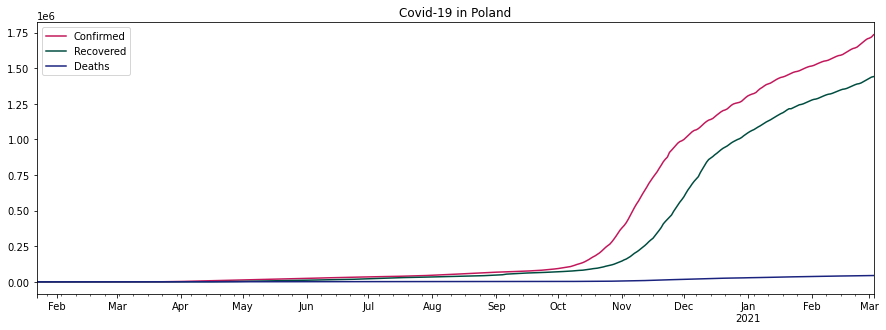

In [ ]:
pl = get('Poland')
pl.plot(figsize=(15,5), color=("#c2185b", "#004d40", "#1a237e"), title = 'Covid-19 in Poland')

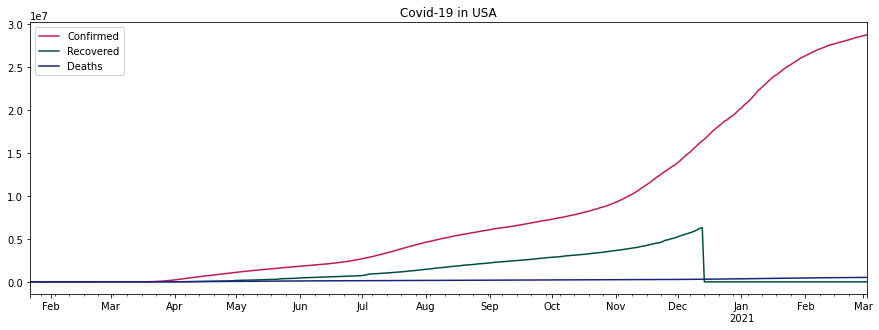

In [ ]:
us=get('US')
us.plot(figsize=(15,5), color=("#c2185b", "#004d40", "#1a237e"), title = 'Covid-19 in USA')

In [21]:
#a definition that supports different countries, the code is nicer
def _get(country, name, data):
    query = data['Country/Region'] == country
    df = (data.loc[query].transpose()[4:])
    df.columns = [name]
    df.index = pd.to_datetime(df.index)
    return df

def get(country):
    return pd.concat((
        _get(country, '{}-Confirmed'.format(country), confirmed),
        _get(country, '{}-Deaths'.format(country), deaths),
        _get(country, '{}-Recovered'.format(country), recovered)
    ), axis='columns')

In [22]:
pl = get('Poland')
us = get('US')

In [25]:
pl.tail(n=5)

,Poland-Confirmed,Poland-Deaths,Poland-Recovered
2021-03-02,1719708,44008,1438032
2021-03-03,1735406,44360,1441479
2021-03-04,1750659,44649,1448619
2021-03-05,1766490,44912,1459564
2021-03-06,1781345,45159,1471608


In [24]:
us.tail(n=5)

,US-Confirmed,US-Deaths,US-Recovered
2021-03-02,28694071,516737,0
2021-03-03,28759980,519205,0
2021-03-04,28827755,521119,0
2021-03-05,28894541,522877,0
2021-03-06,28952952,524362,0


In [26]:
# Serving China which has many provinces ###

query =confirmed['Country/Region'] == 'China'
df = confirmed.loc[query].transpose()[4:]
df = df.sum(axis='columns').map(int)#sum column whitch  China provinces, map(int) - change for integer
df.index = pd.to_datetime(df.index)
df.columns = ['Confirmed']
df


2020-01-22       548
2020-01-23       643
2020-01-24       920
2020-01-25      1406
2020-01-26      2075
               ...  
2021-03-02    101013
2021-03-03    101037
2021-03-04    101055
2021-03-05    101074
2021-03-06    101097
Length: 410, dtype: int64

In [27]:
# Serving China which has many provinces - the code is nicer ###

query =confirmed['Country/Region'] == 'China'
df = (confirmed
      .loc[query]
      .transpose()[4:]
      .sum(axis='columns')
      .map(int))#sum column whitch  China provinces, map(int) - change for integer
df.index = pd.to_datetime(df.index)
df.columns = ['Confirmed']
df

2020-01-22       548
2020-01-23       643
2020-01-24       920
2020-01-25      1406
2020-01-26      2075
               ...  
2021-03-02    101013
2021-03-03    101037
2021-03-04    101055
2021-03-05    101074
2021-03-06    101097
Length: 410, dtype: int64

In [36]:
def _get(country, name, data):
    if country:
        query = data['Country/Region'] == country
        data = data.loc[query]
        
    data = (data
            .transpose()[4:]
            .sum(axis='columns')
            .map(int))#sum column whitch  China provinces, map(int) - change for integer
    
    return pd.DataFrame(
        data = data,
        columns = [name],
        index = pd.to_datetime(data.index))

def get(country=None):
    return pd.concat((
        _get(country, '{}-Confirmed'.format(country), confirmed),
        _get(country, '{}-Recovered'.format(country), recovered),
         _get(country, '{}-Deaths'.format(country), deaths)
    ), axis='columns')

In [37]:
world = get()

In [38]:
world.tail(n=5)

,None-Confirmed,None-Recovered,None-Deaths
2021-03-02,114725935,64903489,2549372
2021-03-03,115165644,65132897,2560422
2021-03-04,115618566,65383177,2570176
2021-03-05,116065801,65609537,2580166
2021-03-06,116502807,65846038,2587977


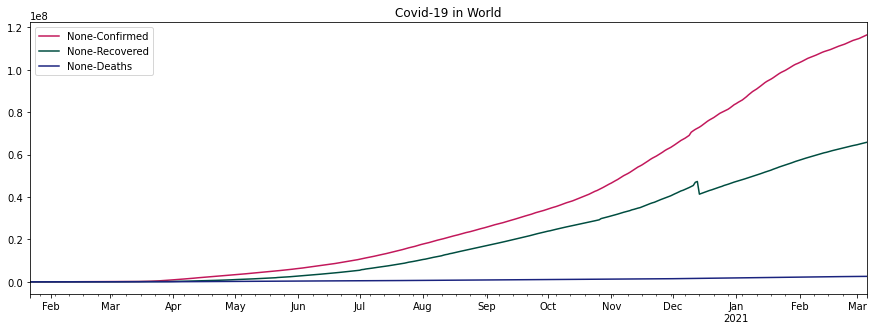

In [39]:
world.plot(figsize=(15,5), color=("#c2185b", "#004d40", "#1a237e"), title="Covid-19 in World") 

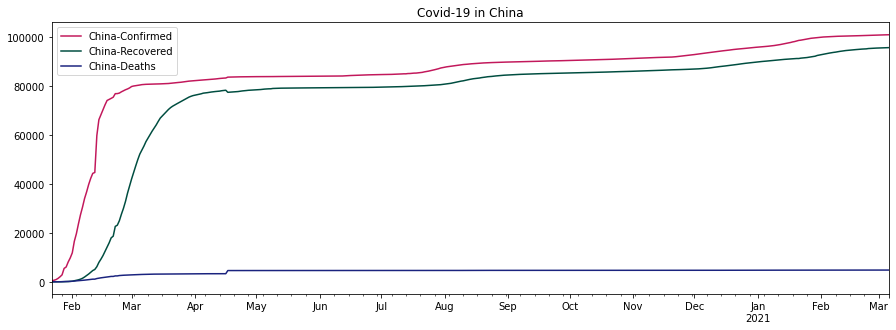

In [40]:
china = get('China')
china.plot(figsize=(15,5), color=("#c2185b", "#004d40", "#1a237e"), title="Covid-19 in China") 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffadbed8610>,
      dtype=object)

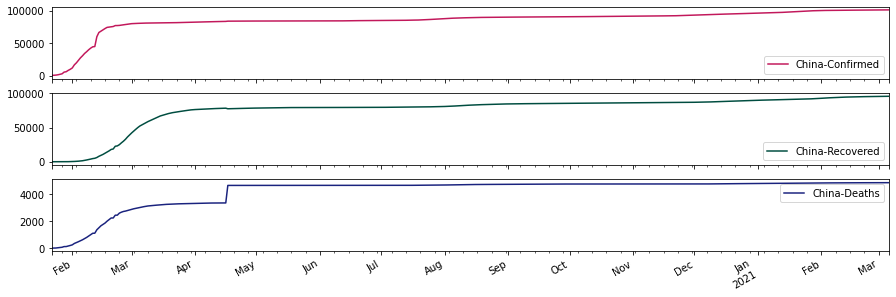

In [42]:
china.plot(subplots=True, figsize=(15,5), color=("#c2185b", "#004d40", "#1a237e"))

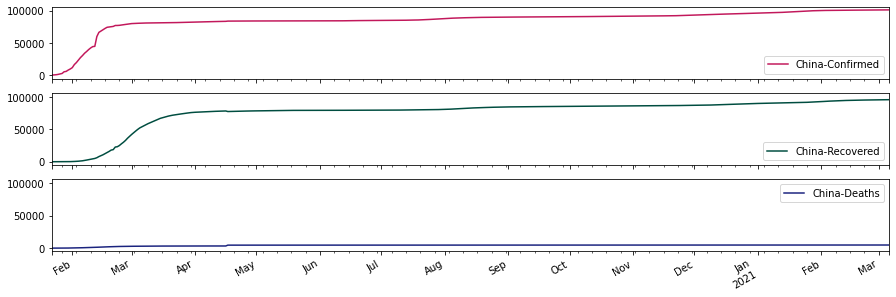

In [45]:
_ = china.plot(subplots=True,sharex=True, sharey=True, figsize=(15,5),color=("#c2185b", "#004d40", "#1a237e")) #the same scale on 3 charts

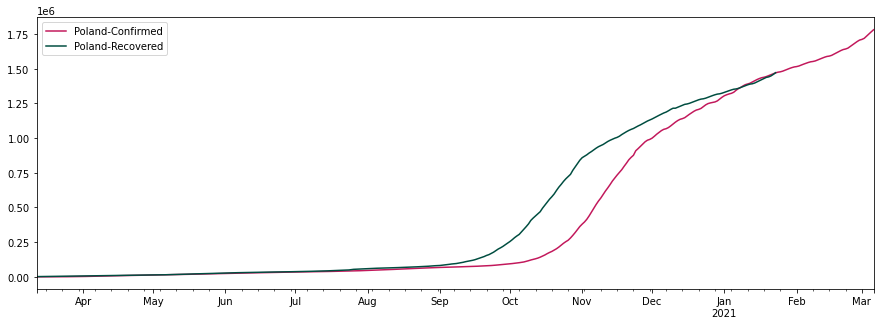

In [48]:
c= poland['Poland-Confirmed'] # Correlation of Confirmed and Recovery
r= poland['Poland-Recovered']
r.index = r.index - pd.Timedelta(days=14)
cr = pd.concat((
    c['2020-03-12':],
    r['2020-03-12':],
), axis='columns')
cr.plot(figsize=(15,5), color=("#c2185b", "#004d40"))


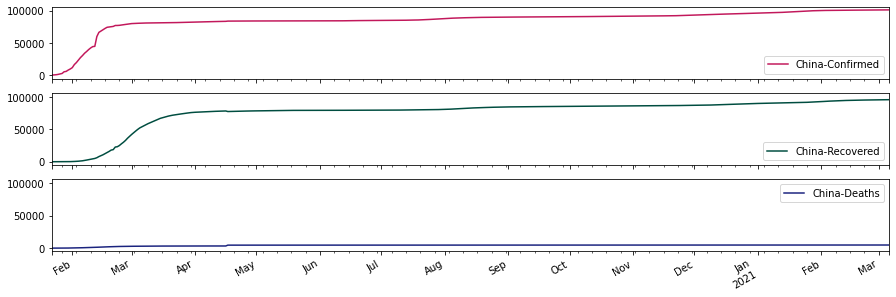

In [ ]:
_ = china.plot(subplots=True,sharex=True, sharey=True, figsize=(15,5),color=("#c2185b", "#004d40", "#1a237e")) #the same scale on 3 charts

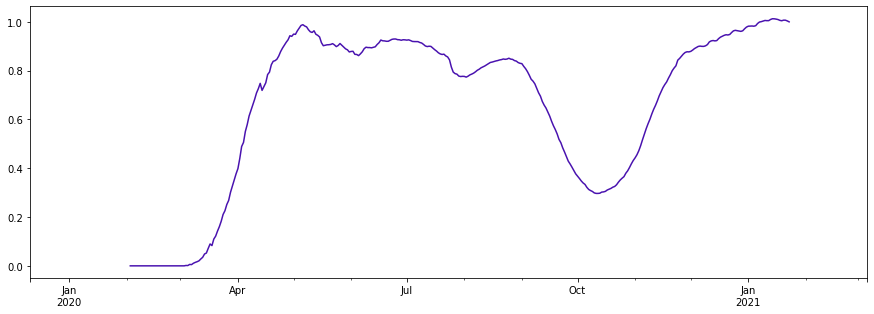

In [58]:
(c/r).plot(figsize=(15,5), color=("#4912af"))# Relationship between confirmed and recovery



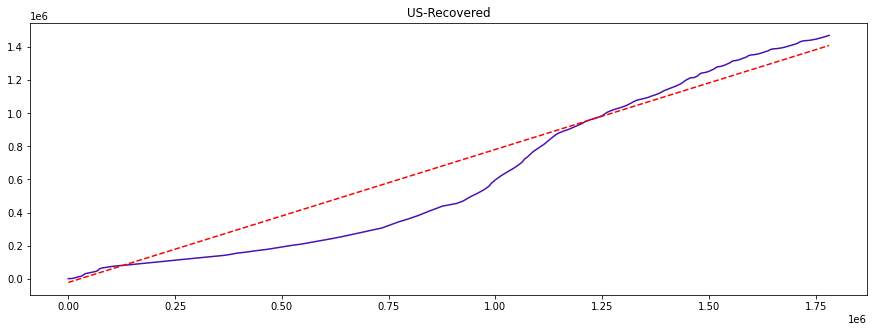

In [70]:
# Recovery rate
import matplotlib.pyplot as plt
import numpy as np

x = c[:len(r)]
y = r
plt.figure(figsize=(15,5))
model = np.polyfit(x,y,1)
trend = np.poly1d(model)

plt.title('US-Recovered')
plt.plot(x, y, label = 'data', color=("#4912af"))
plt.plot(x, trend(x), color='red', linestyle='--', label='trend')
plt.show()


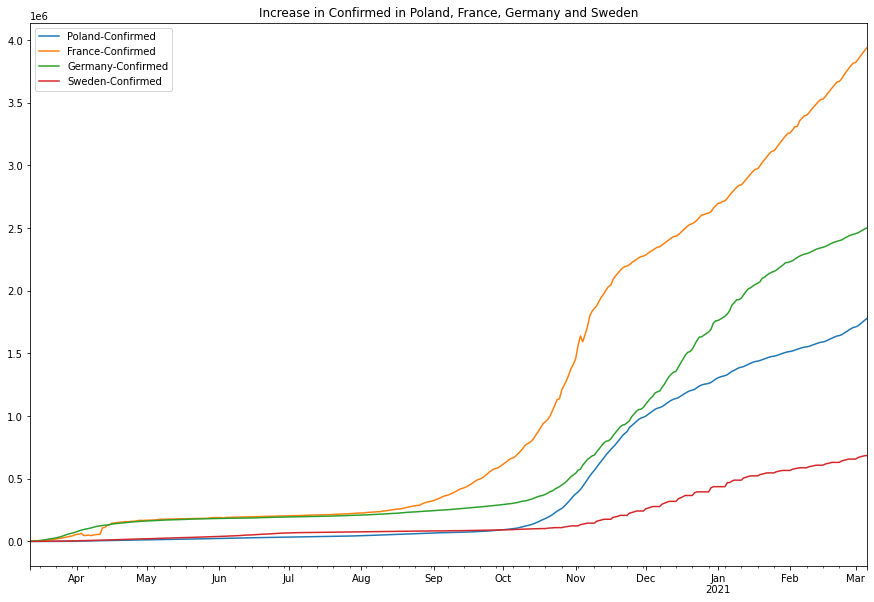

In [82]:
poland = get('Poland')['Poland-Confirmed']
france = get('France')['France-Confirmed']
germany = get('Germany')['Germany-Confirmed']
sweden = get('Sweden')['Sweden-Confirmed']
razem = pd.concat((
    poland['2020-03-12':],
    france['2020-03-12':],
    germany['2020-03-12':],
    sweden['2020-03-12':],
), axis='columns')
razem.plot(figsize=(15,10), title = 'Increase in Confirmed in Poland, France, Germany and Sweden')
